<a href="https://colab.research.google.com/github/Poorna-20/FML/blob/main/Univariate_Regression_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('drive/MyDrive/datasets/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


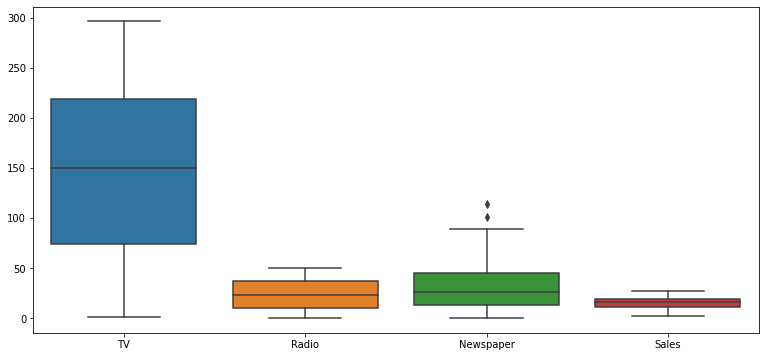

In [3]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=data)
plt.show()

In [4]:
q1 = data["Newspaper"].quantile(0.25)
q3 = data["Newspaper"].quantile(0.75)
iqr=q3-q1
print(iqr)
     

32.35


In [5]:
up = q3+1.5*iqr
down = q1-1.5*iqr
print(up,down)

93.625 -35.775000000000006


In [7]:
outlier=[]
profit=data["Newspaper"]

for i in profit:
  if i>up:
    outlier.append(i)
    print("Up Outlier :",i)
for i in profit:
  if i<down:
    outlier.append(i)
    print("Down Outlier",i)


Up Outlier : 114.0
Up Outlier : 100.9


In [8]:
data["Newspaper"]=data["Newspaper"].replace(outlier,data["Newspaper"].mean())

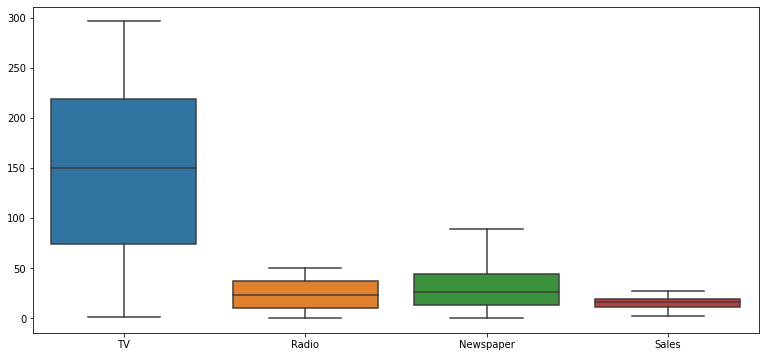

In [9]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=data)
plt.show()

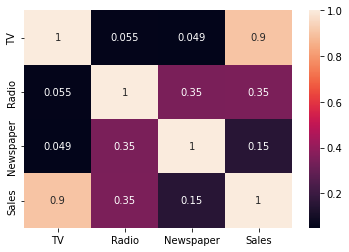

In [11]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
X = data['TV'].values
y = data['Sales'].values
print(X.shape,y.shape)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(200,) (200,)
(200, 1) (200, 1)


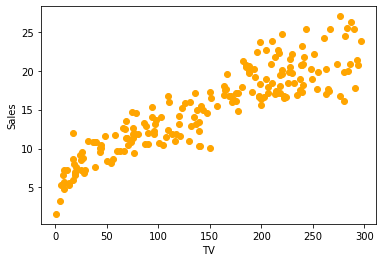

In [24]:
plt.scatter(X,y,color='orange')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=120)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
y_predict = reg.predict(X_train)


In [17]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.8381468635971825
MSE : 5.275468636514065
RMSE : 2.2968388355550906
R2_SCORE : 0.8134414966713854


In [20]:
y_predict_test = reg.predict(X_test)


In [21]:
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.800278506726766
MSE : 5.133630091035537
RMSE : 2.2657515510389783
R2_SCORE : 0.8003952299407135


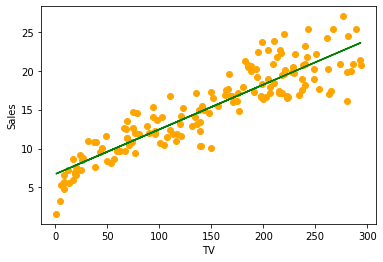

In [23]:
plt.scatter(X_train,y_train,color='orange')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot(X_train,y_predict,color ='green')
plt.show()
     